In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../MachineLearning/datasets/2023_nba_player_stats.csv')

In [29]:
df.head()
df.shape

(539, 19)

In [4]:
df.rename(columns = {'GP':'Games_Played','Min':'Minutes_Played','FGM':'Field_Goals_Made','FGA':'Field_Goals_Attempted','FG%':'Field_Goal_Percentag'\
                        ,'OREB':'Offensive_Rebounds','DREB':'Defensive_Rebounds','REB':'Rebounds','AST':'Assist','TOV':'Turnover','STL':'Steals','BLK':'Blocks'\
                        ,'PF':'Personal_Fouls','FP':'Fantasy_Points','DD2':'Doublde_Doubles','TD3':'Triple_Doubles'},inplace = True)

In [5]:
df.head()

,Player,POS,Team,Age,Games_Played,W,L,Minutes_Played,PTS,Field_Goals_Made,...,Rebounds,Assist,Turnover,Steals,Blocks,Personal_Fouls,Fantasy_Points,Doublde_Doubles,Triple_Doubles,+/-
0,Jayson Tatum,SF,BOS,25.0,74.0,52.0,22.0,2732.2,2225.0,727.0,...,649.0,342.0,213.0,78.0,51.0,160.0,3691.0,31.0,1.0,470.0
1,Joel Embiid,C,PHI,29.0,66.0,43.0,23.0,2284.1,2183.0,728.0,...,670.0,274.0,226.0,66.0,112.0,205.0,3706.0,39.0,1.0,424.0
2,Luka Doncic,PG,DAL,24.0,66.0,33.0,33.0,2390.5,2138.0,719.0,...,569.0,529.0,236.0,90.0,33.0,166.0,3747.0,36.0,10.0,128.0
3,Shai Gilgeous-Alexander,PG,OKC,24.0,68.0,33.0,35.0,2416.0,2135.0,704.0,...,329.0,371.0,192.0,112.0,65.0,192.0,3425.0,3.0,0.0,149.0
4,Giannis Antetokounmpo,PF,MIL,28.0,63.0,47.0,16.0,2023.6,1959.0,707.0,...,742.0,359.0,246.0,52.0,51.0,197.0,3451.0,46.0,6.0,341.0


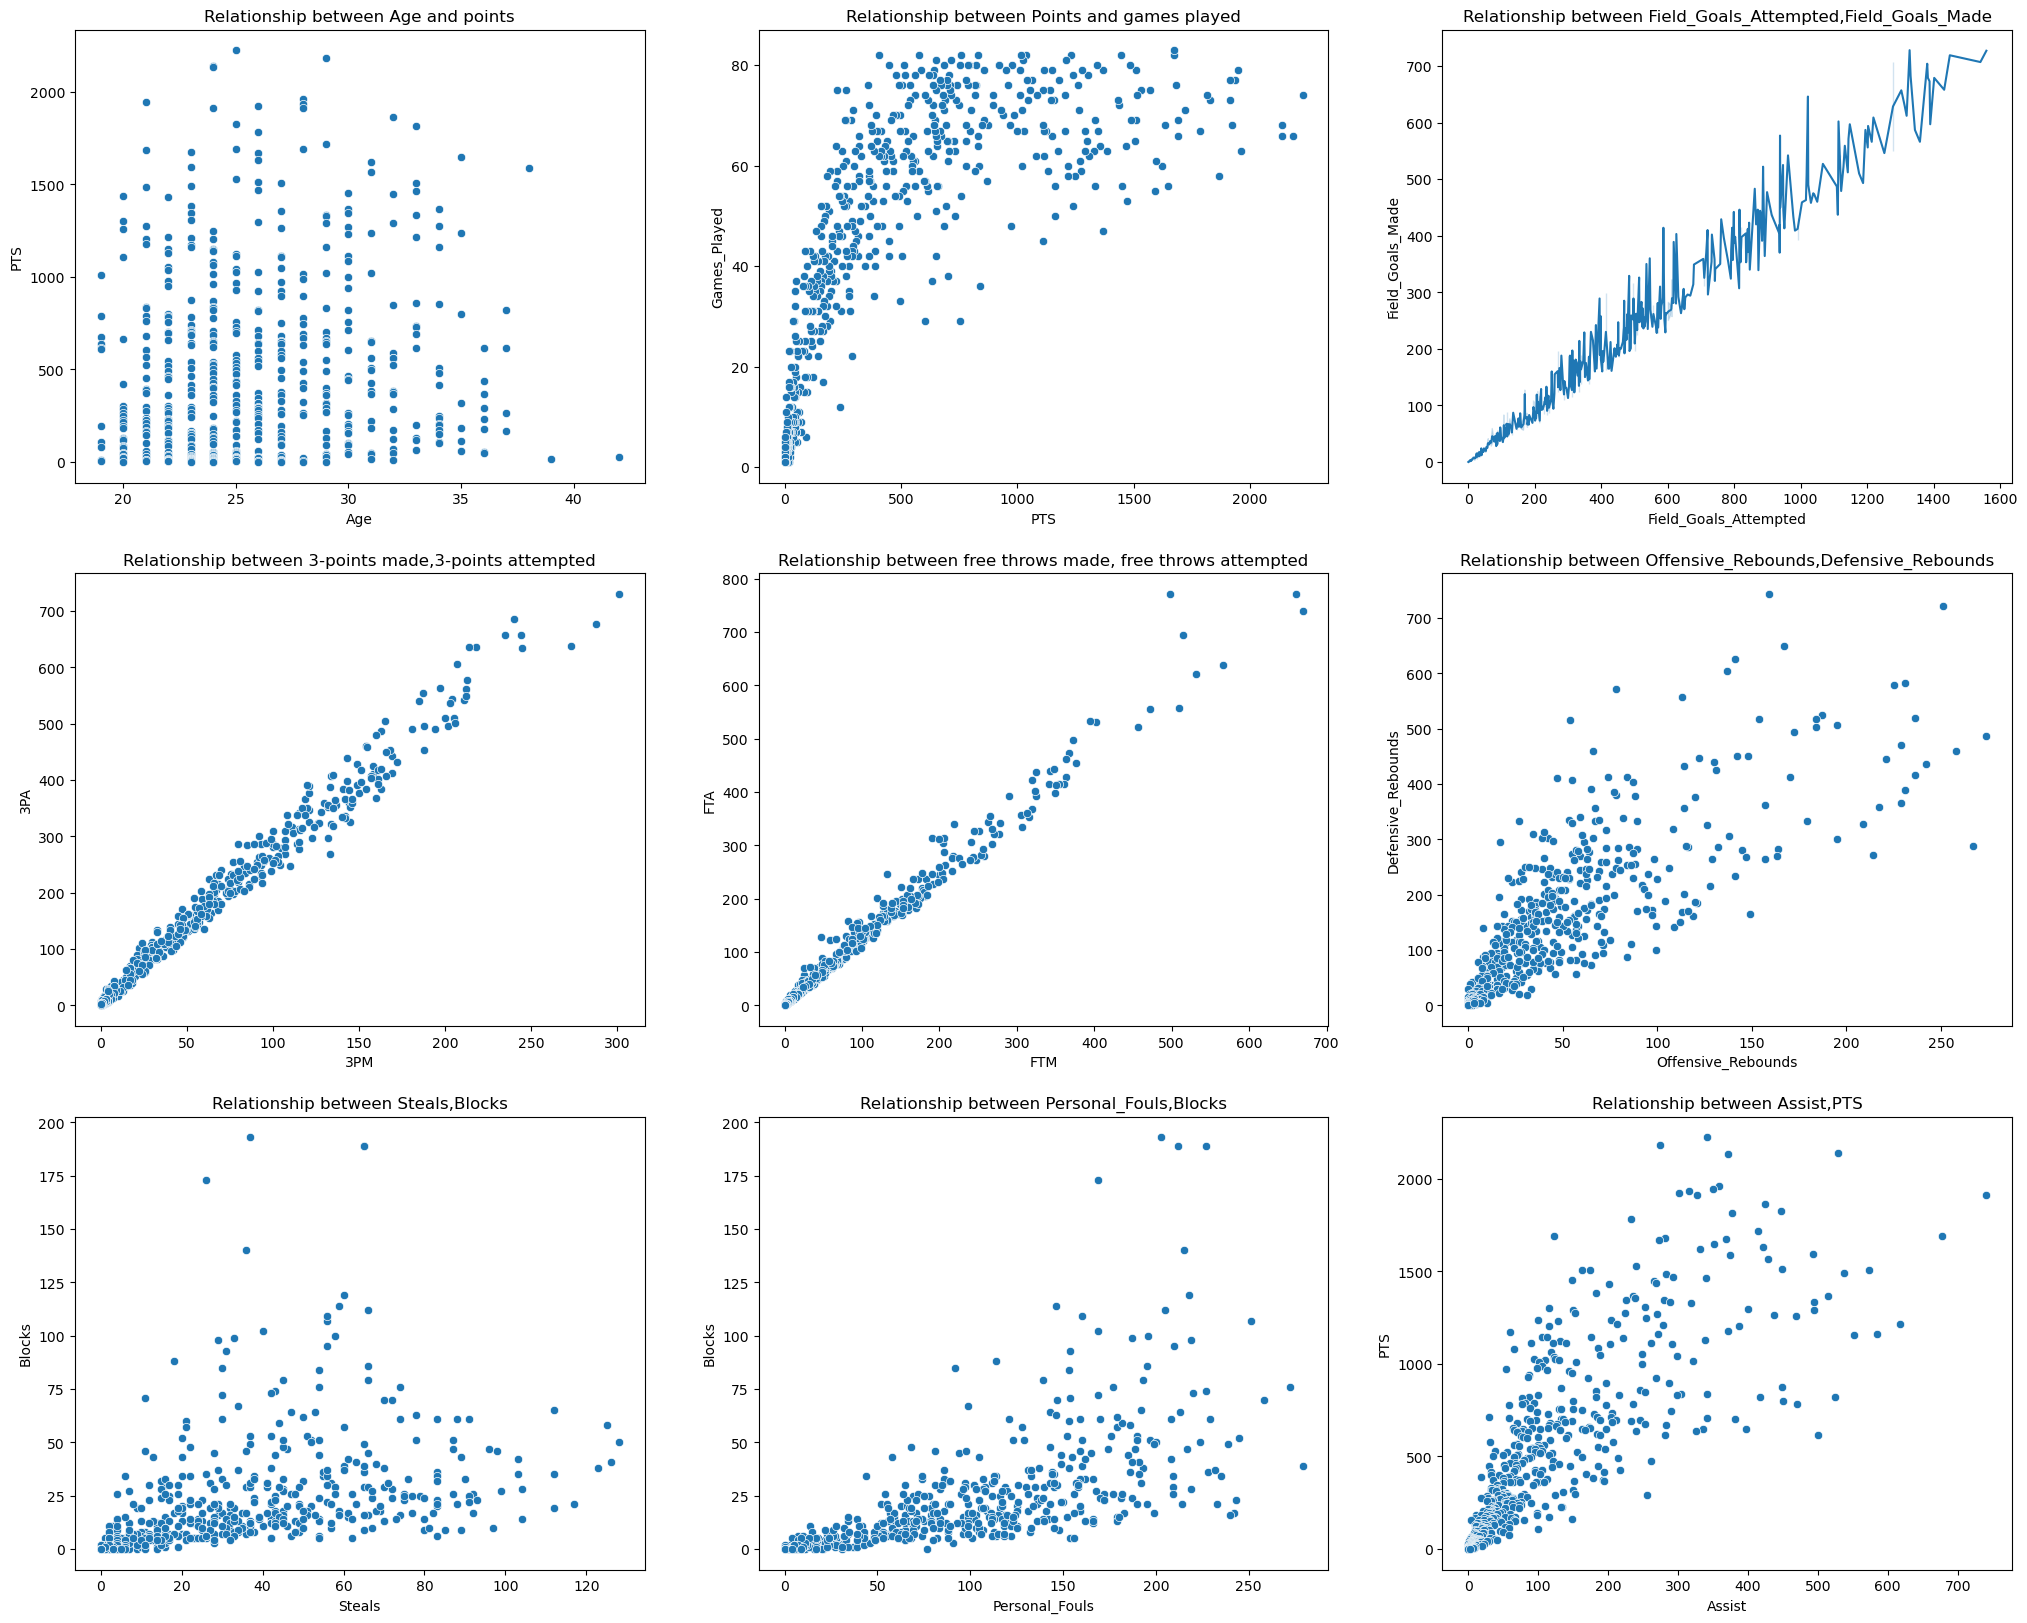

In [9]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(25,20))
sns.scatterplot(ax=ax[0,0],x='Age',y='PTS',data=df)
sns.scatterplot(ax=ax[0,1],data=df,x='PTS',y='Games_Played')
sns.lineplot(ax=ax[0,2],data=df,x='Field_Goals_Attempted',y='Field_Goals_Made')

sns.scatterplot(ax=ax[1,0],x='3PM',y='3PA',data=df)
sns.scatterplot(ax=ax[1,1],data=df,x='FTM',y='FTA')
sns.scatterplot(ax=ax[1,2],data=df,x='Offensive_Rebounds',y='Defensive_Rebounds')

sns.scatterplot(ax=ax[2,0],data=df,x='Steals',y='Blocks')
sns.scatterplot(ax=ax[2,1],data=df,x='Personal_Fouls',y='Blocks')
sns.scatterplot(ax=ax[2,2],data=df,x='Assist',y='PTS')


ax[0,0].title.set_text('Relationship between Age and points')
ax[0,1].title.set_text('Relationship between Points and games played')
ax[0,2].title.set_text('Relationship between Field_Goals_Attempted,Field_Goals_Made')

ax[1,0].title.set_text('Relationship between 3-points made,3-points attempted')
ax[1,1].title.set_text('Relationship between free throws made, free throws attempted')
ax[1,2].title.set_text('Relationship between Offensive_Rebounds,Defensive_Rebounds')

ax[2,0].title.set_text('Relationship between Steals,Blocks')
ax[2,1].title.set_text('Relationship between Personal_Fouls,Blocks')
ax[2,2].title.set_text('Relationship between Assist,PTS')

<AxesSubplot:title={'center':'Aveger team loss and wins'}, xlabel='Team'>

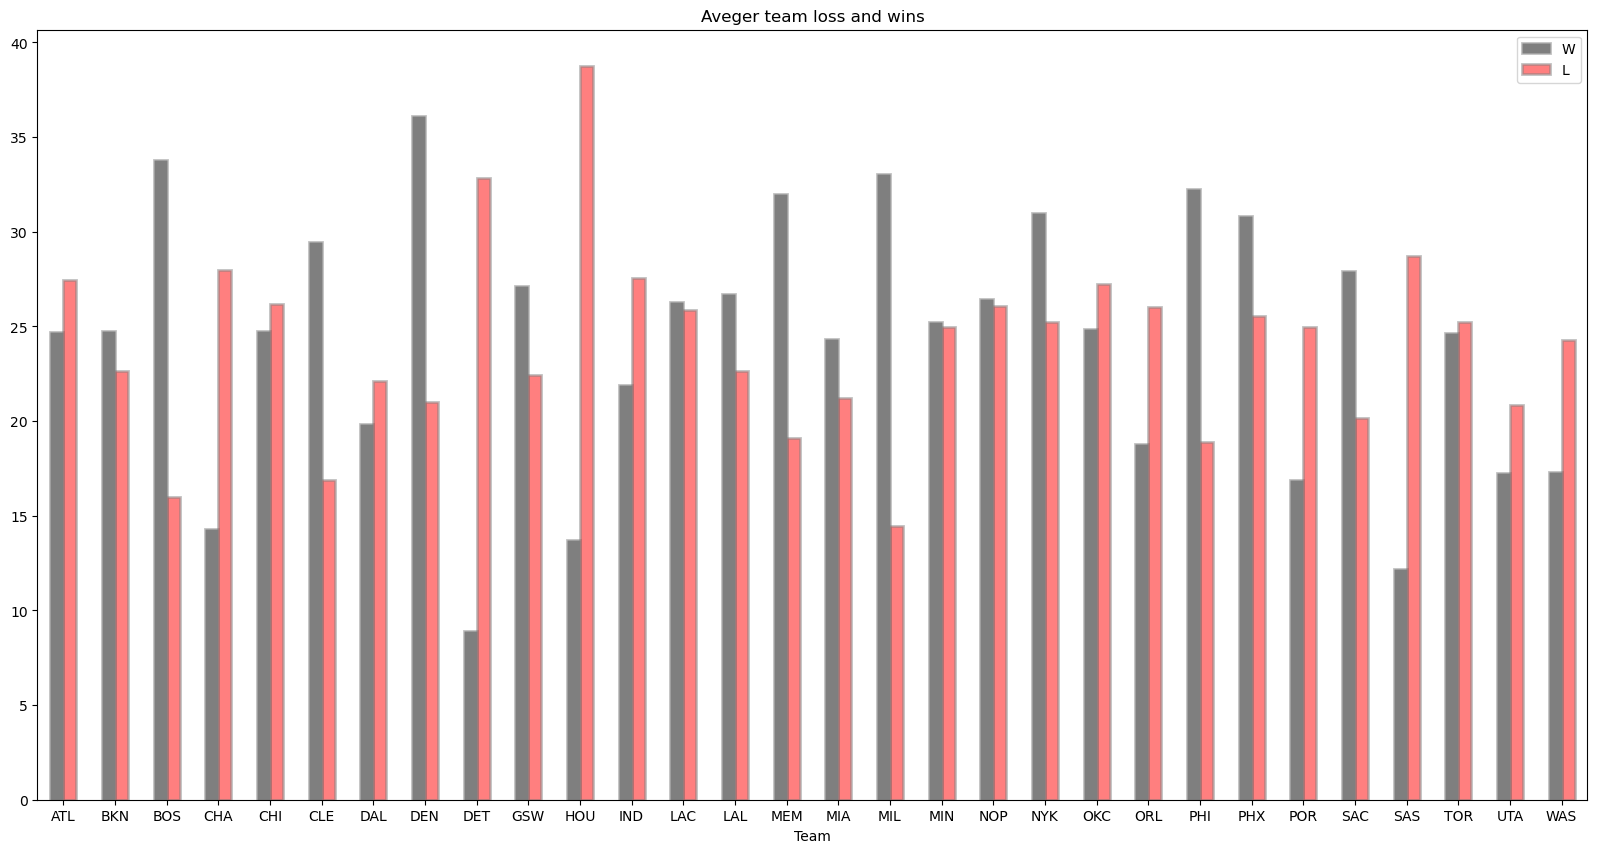

In [12]:
df.groupby(['Team']).agg({'W':'mean','L':'mean'}).plot(kind='bar',
    figsize=(20,10),rot=0,color=['black','red'],edgecolor='gray',linewidth=2,alpha=0.5,title='Aveger team loss and wins')


In [13]:
df[['3P%','FT%','Field_Goal_Percentag']].median()

3P%                     34.2
FT%                     76.3
Field_Goal_Percentag    45.5
dtype: float64

<AxesSubplot:xlabel='POS', ylabel='PTS'>

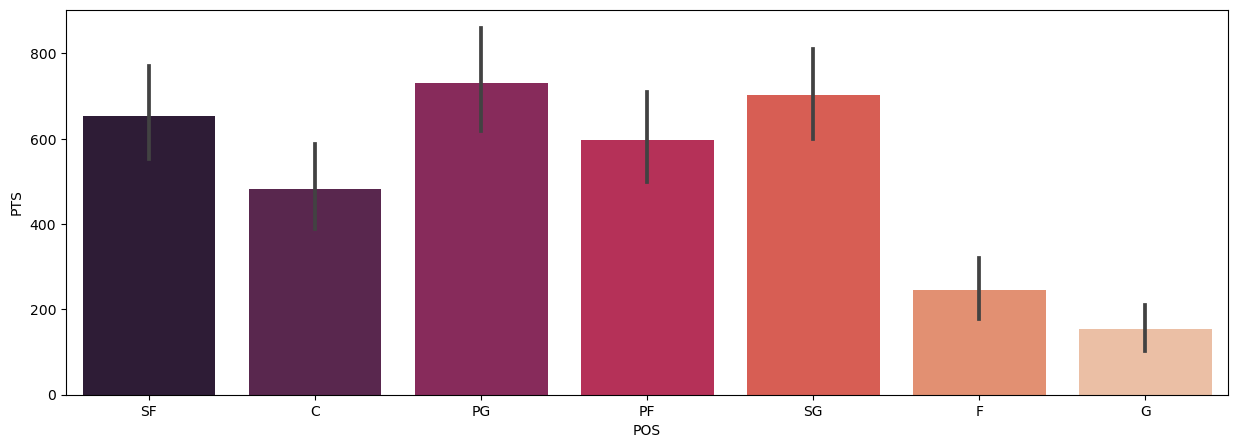

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x='POS',y='PTS',data=df,palette='rocket')

In [15]:
df['Offensive_score'] = df['PTS'] +df['Field_Goal_Percentag']+ df['3P%']+df['Assist']+df['Steals']
df['Defnsive_score'] = df['Defensive_Rebounds'] +df['Blocks']+ df['Steals']

<AxesSubplot:xlabel='POS', ylabel='Defnsive_score'>

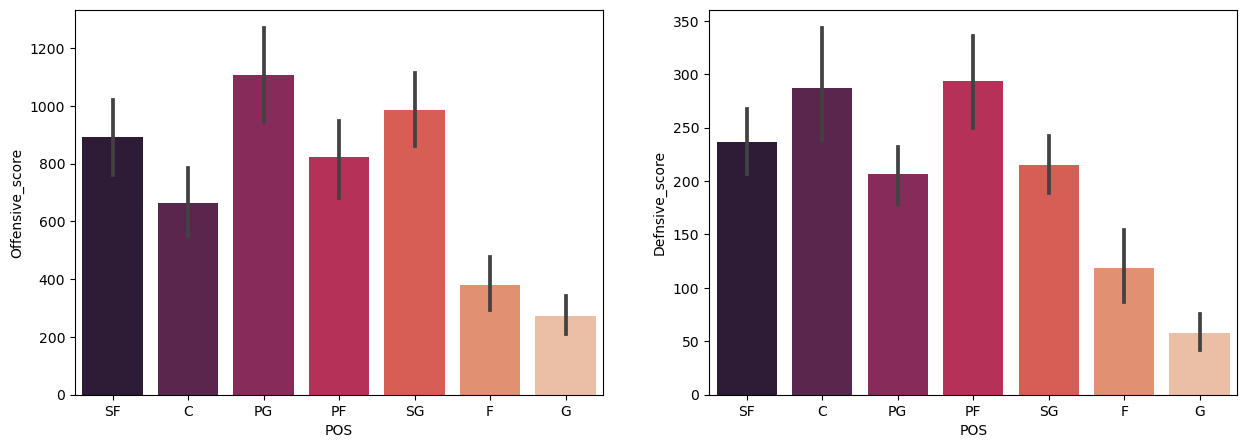

In [18]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.barplot(ax=ax[0],x='POS',y='Offensive_score',data=df,palette='rocket')
sns.barplot(ax=ax[1],x='POS',y='Defnsive_score',data=df,palette='rocket')
   

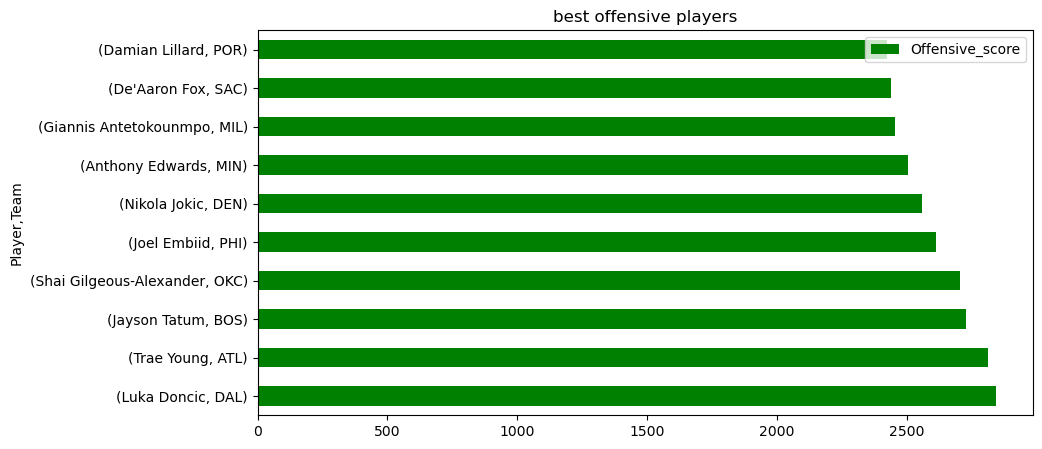

In [19]:
best_offensive_players=df.groupby(['Player','Team']).agg({'Offensive_score':'max'}).sort_values(by='Offensive_score',ascending=False).head(10).\
    plot(kind='barh',color='green',figsize=(10,5),title='best offensive players')
    

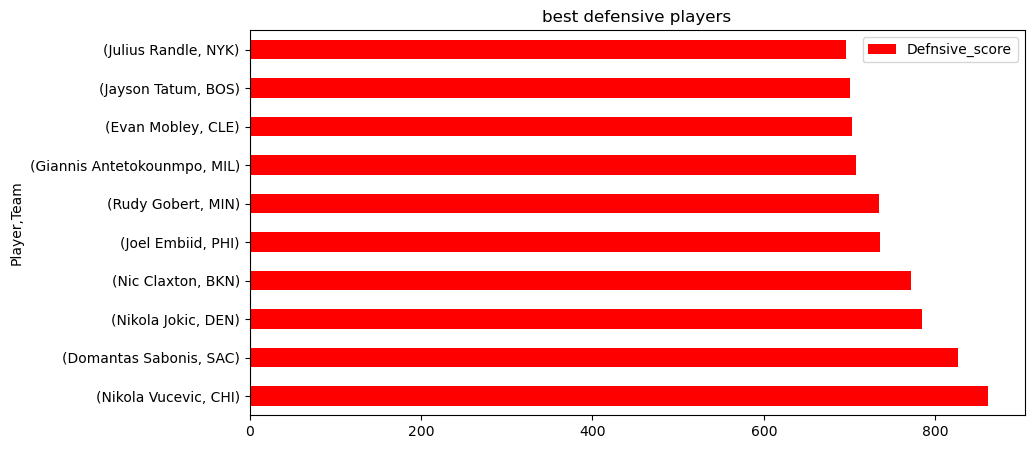

In [22]:
best_defensive_players=df.groupby(['Player','Team']).agg({'Defnsive_score':'max'}).sort_values(by='Defnsive_score',ascending=False).head(10).\
    plot(kind='barh',color='red',figsize=(10,5),title='best defensive players')

Text(0.5, 1.0, 'Corrolation between all values')

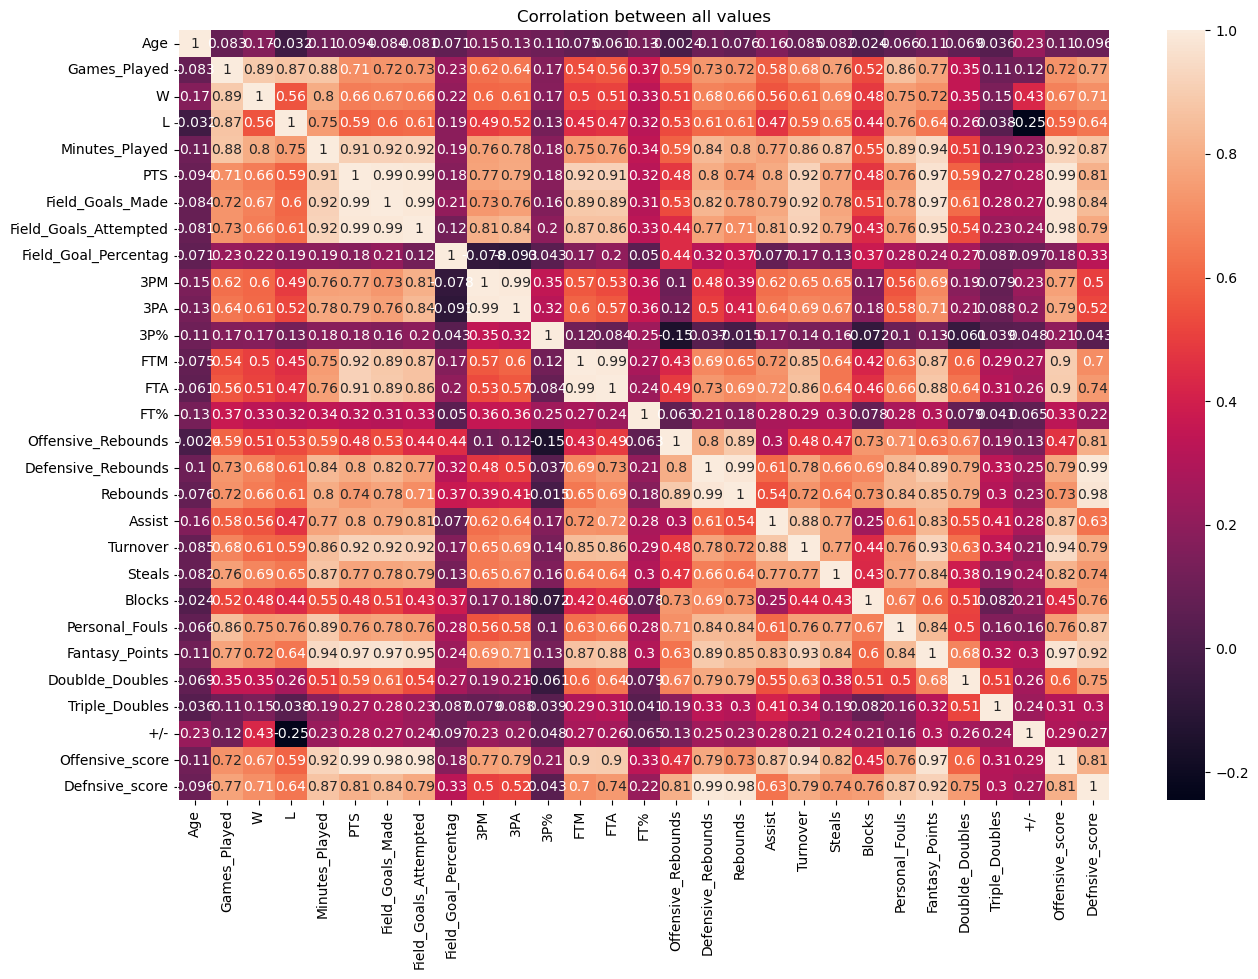

In [23]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr,annot = True)
plt.title('Corrolation between all values')

In [24]:
df.drop(columns = ['Player','POS','Team','Field_Goals_Made','Field_Goals_Attempted','3PM','3PA','3P%','Fantasy_Points',
                   'Doublde_Doubles','Triple_Doubles','Offensive_score','Defnsive_score'],inplace = True)

In [26]:
df.head()

,Age,Games_Played,W,L,Minutes_Played,PTS,Field_Goal_Percentag,FTM,FTA,FT%,Offensive_Rebounds,Defensive_Rebounds,Rebounds,Assist,Turnover,Steals,Blocks,Personal_Fouls,+/-
0,25.0,74.0,52.0,22.0,2732.2,2225.0,46.6,531.0,622.0,85.4,78.0,571.0,649.0,342.0,213.0,78.0,51.0,160.0,470.0
1,29.0,66.0,43.0,23.0,2284.1,2183.0,54.8,661.0,771.0,85.7,113.0,557.0,670.0,274.0,226.0,66.0,112.0,205.0,424.0
2,24.0,66.0,33.0,33.0,2390.5,2138.0,49.6,515.0,694.0,74.2,54.0,515.0,569.0,529.0,236.0,90.0,33.0,166.0,128.0
3,24.0,68.0,33.0,35.0,2416.0,2135.0,51.0,669.0,739.0,90.5,59.0,270.0,329.0,371.0,192.0,112.0,65.0,192.0,149.0
4,28.0,63.0,47.0,16.0,2023.6,1959.0,55.3,498.0,772.0,64.5,137.0,605.0,742.0,359.0,246.0,52.0,51.0,197.0,341.0


In [28]:
df.shape

(539, 19)

In [35]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.neighbors import NearestNeighbors,KNeighborsRegressor
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler    

In [59]:
X=df.drop('PTS',axis=1)
Y=df['PTS']

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)   

# RANDOM FOREST

In [61]:
rf=RandomForestRegressor(n_estimators=100,max_depth=5)
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)

r2_score(Y_test,rf_pred)


0.9594689455720546

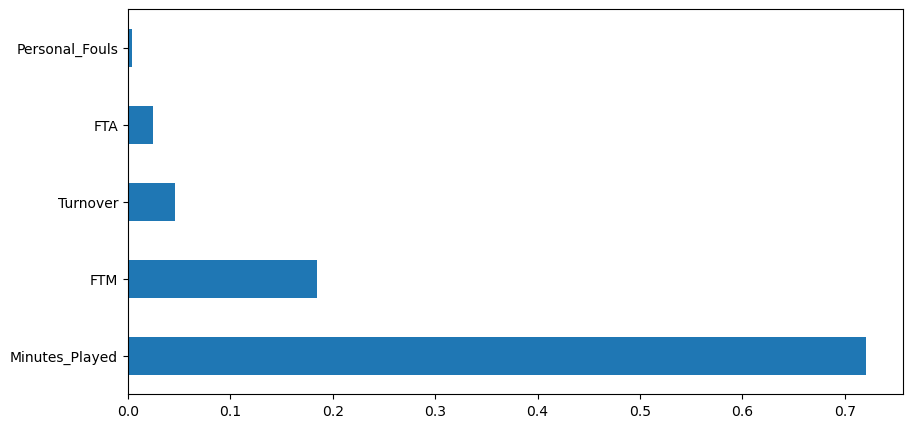

In [62]:
from sklearn.feature_selection import RFE
feat_impotance=pd.Series(rf.feature_importances_,index=X.columns)
feat_impotance.nlargest(5).plot(kind='barh',figsize=(10,5))
plt.show()

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# KNN

In [64]:
knn=KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)

r2_score(Y_test,knn_pred)

0.9216442516494817

In [74]:
line=LinearRegression()
line.fit(X_train,Y_train)
line_pred=line.predict(X_test)

r2_score(Y_test,line_pred)

0.972171527037185

In [65]:
from sklearn.feature_selection import mutual_info_regression

feat_impotance=mutual_info_regression(X_train,Y_train)
sorted_feature=np.argsort(feat_impotance)[::-1]

print('Top 5 features:')
for feature in sorted_feature[:5]:
    print(df.columns[feature])

Top 5 features:
Minutes_Played
Field_Goal_Percentag
Assist
FTM
Offensive_Rebounds


In [66]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.5, l1_ratio=0.5)
model.fit(X_train, Y_train)
elastic_pred = model.predict(X_test)

r2_score(Y_test,elastic_pred)

0.9463387233465754